In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [26]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [27]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[116.   111.   108.  ]
   [115.5  110.5  107.5 ]
   [113.25 108.25 105.25]
   ...
   [124.25 116.25 114.25]
   [125.   117.   115.  ]
   [126.25 118.25 116.25]]

  [[117.   112.   109.  ]
   [114.5  109.5  106.5 ]
   [115.25 110.25 107.25]
   ...
   [127.25 119.25 117.25]
   [128.5  120.5  118.5 ]
   [129.25 121.25 119.25]]

  [[114.75 109.75 106.75]
   [112.75 107.75 104.75]
   [114.   109.   106.  ]
   ...
   [135.25 127.25 125.25]
   [132.25 124.25 122.25]
   [128.25 120.25 118.25]]

  ...

  [[168.25 160.25 158.25]
   [169.5  161.5  159.5 ]
   [170.75 162.75 160.75]
   ...
   [182.75 174.75 171.75]
   [188.   180.   177.  ]
   [187.25 179.25 176.25]]

  [[169.75 161.75 159.75]
   [171.75 163.75 161.75]
   [174.   166.   164.  ]
   ...
   [177.75 169.75 166.75]
   [183.5  175.5  172.5 ]
   [182.5  174.5  171.5 ]]

  [[169.   161.   159.  ]
   [166.5  158.5  156.5 ]
   [167.5  159.5  157.5 ]
   ...
   [173.5  165.5  162.5 ]
   [175.75 167.75 164.75]
   [175.75 167.75 16

In [28]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Dropout(0.25))

In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.4))

In [39]:
model.add(Dense(units=38,activation='softmax'))

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6355s 3s/step - accuracy: 0.3820 - loss: 2.1882 - val_accuracy: 0.8066 - val_loss: 0.6117
Epoch 2/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6453s 3s/step - accuracy: 0.8336 - loss: 0.5220 - val_accuracy: 0.8949 - val_loss: 0.3313
Epoch 3/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6932s 3s/step - accuracy: 0.9063 - loss: 0.2942 - val_accuracy: 0.9191 - val_loss: 0.2502
Epoch 4/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5979s 3s/step - accuracy: 0.9328 - loss: 0.2055 - val_accuracy: 0.9472 - val_loss: 0.1585
Epoch 5/5
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6097s 3s/step - accuracy: 0.9510 - loss: 0.1478 - val_accuracy: 0.9500 - val_loss: 0.1553


In [43]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1419s 646ms/step - accuracy: 0.9715 - loss: 0.0836


In [44]:
print(train_loss,train_acc)

0.07501571625471115 0.9746354818344116


In [45]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 352s 640ms/step - accuracy: 0.9491 - loss: 0.1577


In [46]:
print(val_loss,val_acc)

0.15526288747787476 0.9499772191047668


In [50]:
model.save("trained_model.keras")

In [51]:
training_history.history

{'accuracy': [0.589928150177002,
  0.856319785118103,
  0.9134219884872437,
  0.9392275214195251,
  0.9537093639373779],
 'loss': [1.3916863203048706,
  0.45155036449432373,
  0.26901525259017944,
  0.18751318752765656,
  0.13928940892219543],
 'val_accuracy': [0.806624174118042,
  0.8948895931243896,
  0.9190757870674133,
  0.9471887350082397,
  0.9499772191047668],
 'val_loss': [0.6117039918899536,
  0.3312956988811493,
  0.2502133548259735,
  0.15854622423648834,
  0.15526282787322998]}

In [52]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

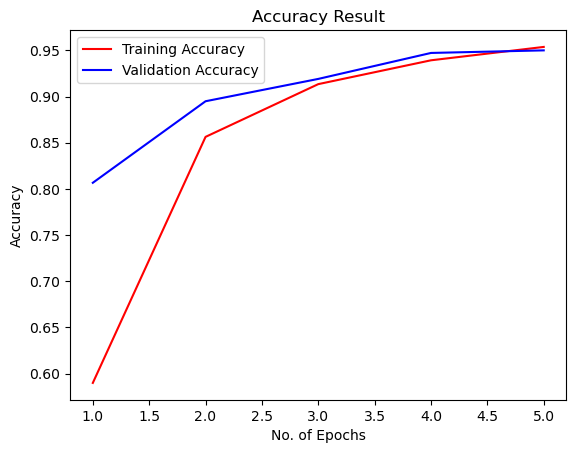

In [54]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Result')
plt.legend()
plt.show()

In [55]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 371s 673ms/step


(array([[9.99983311e-01, 2.35282755e-06, 3.24452749e-08, ...,
         2.41610551e-11, 1.04155122e-11, 5.32447628e-11],
        [9.99855280e-01, 2.38539064e-06, 1.26250157e-08, ...,
         1.00832849e-10, 6.36738275e-12, 8.53726048e-11],
        [9.99995232e-01, 6.98751876e-07, 1.04529924e-07, ...,
         9.72036240e-14, 5.66923765e-12, 1.82614011e-11],
        ...,
        [6.80264407e-07, 6.55443699e-10, 1.24141593e-06, ...,
         1.01307114e-08, 3.69202944e-08, 9.99957442e-01],
        [1.80509360e-05, 5.74116710e-09, 3.98922884e-06, ...,
         3.62056028e-07, 1.27246906e-07, 9.99879599e-01],
        [1.30592923e-07, 1.31748168e-09, 8.10823551e-08, ...,
         2.28618244e-08, 2.71235717e-06, 9.85875905e-01]], dtype=float32),
 (17572, 38))

In [58]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [59]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [61]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.91      0.98      0.94       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.98      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.93      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.94      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.91      0.

In [71]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[482,   3,   4, ...,   0,   0,   0],
       [  0, 486,   3, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 479,   0,   0],
       [  0,   0,   0, ...,   0, 439,   0],
       [  2,   0,   2, ...,   0,   0, 403]])

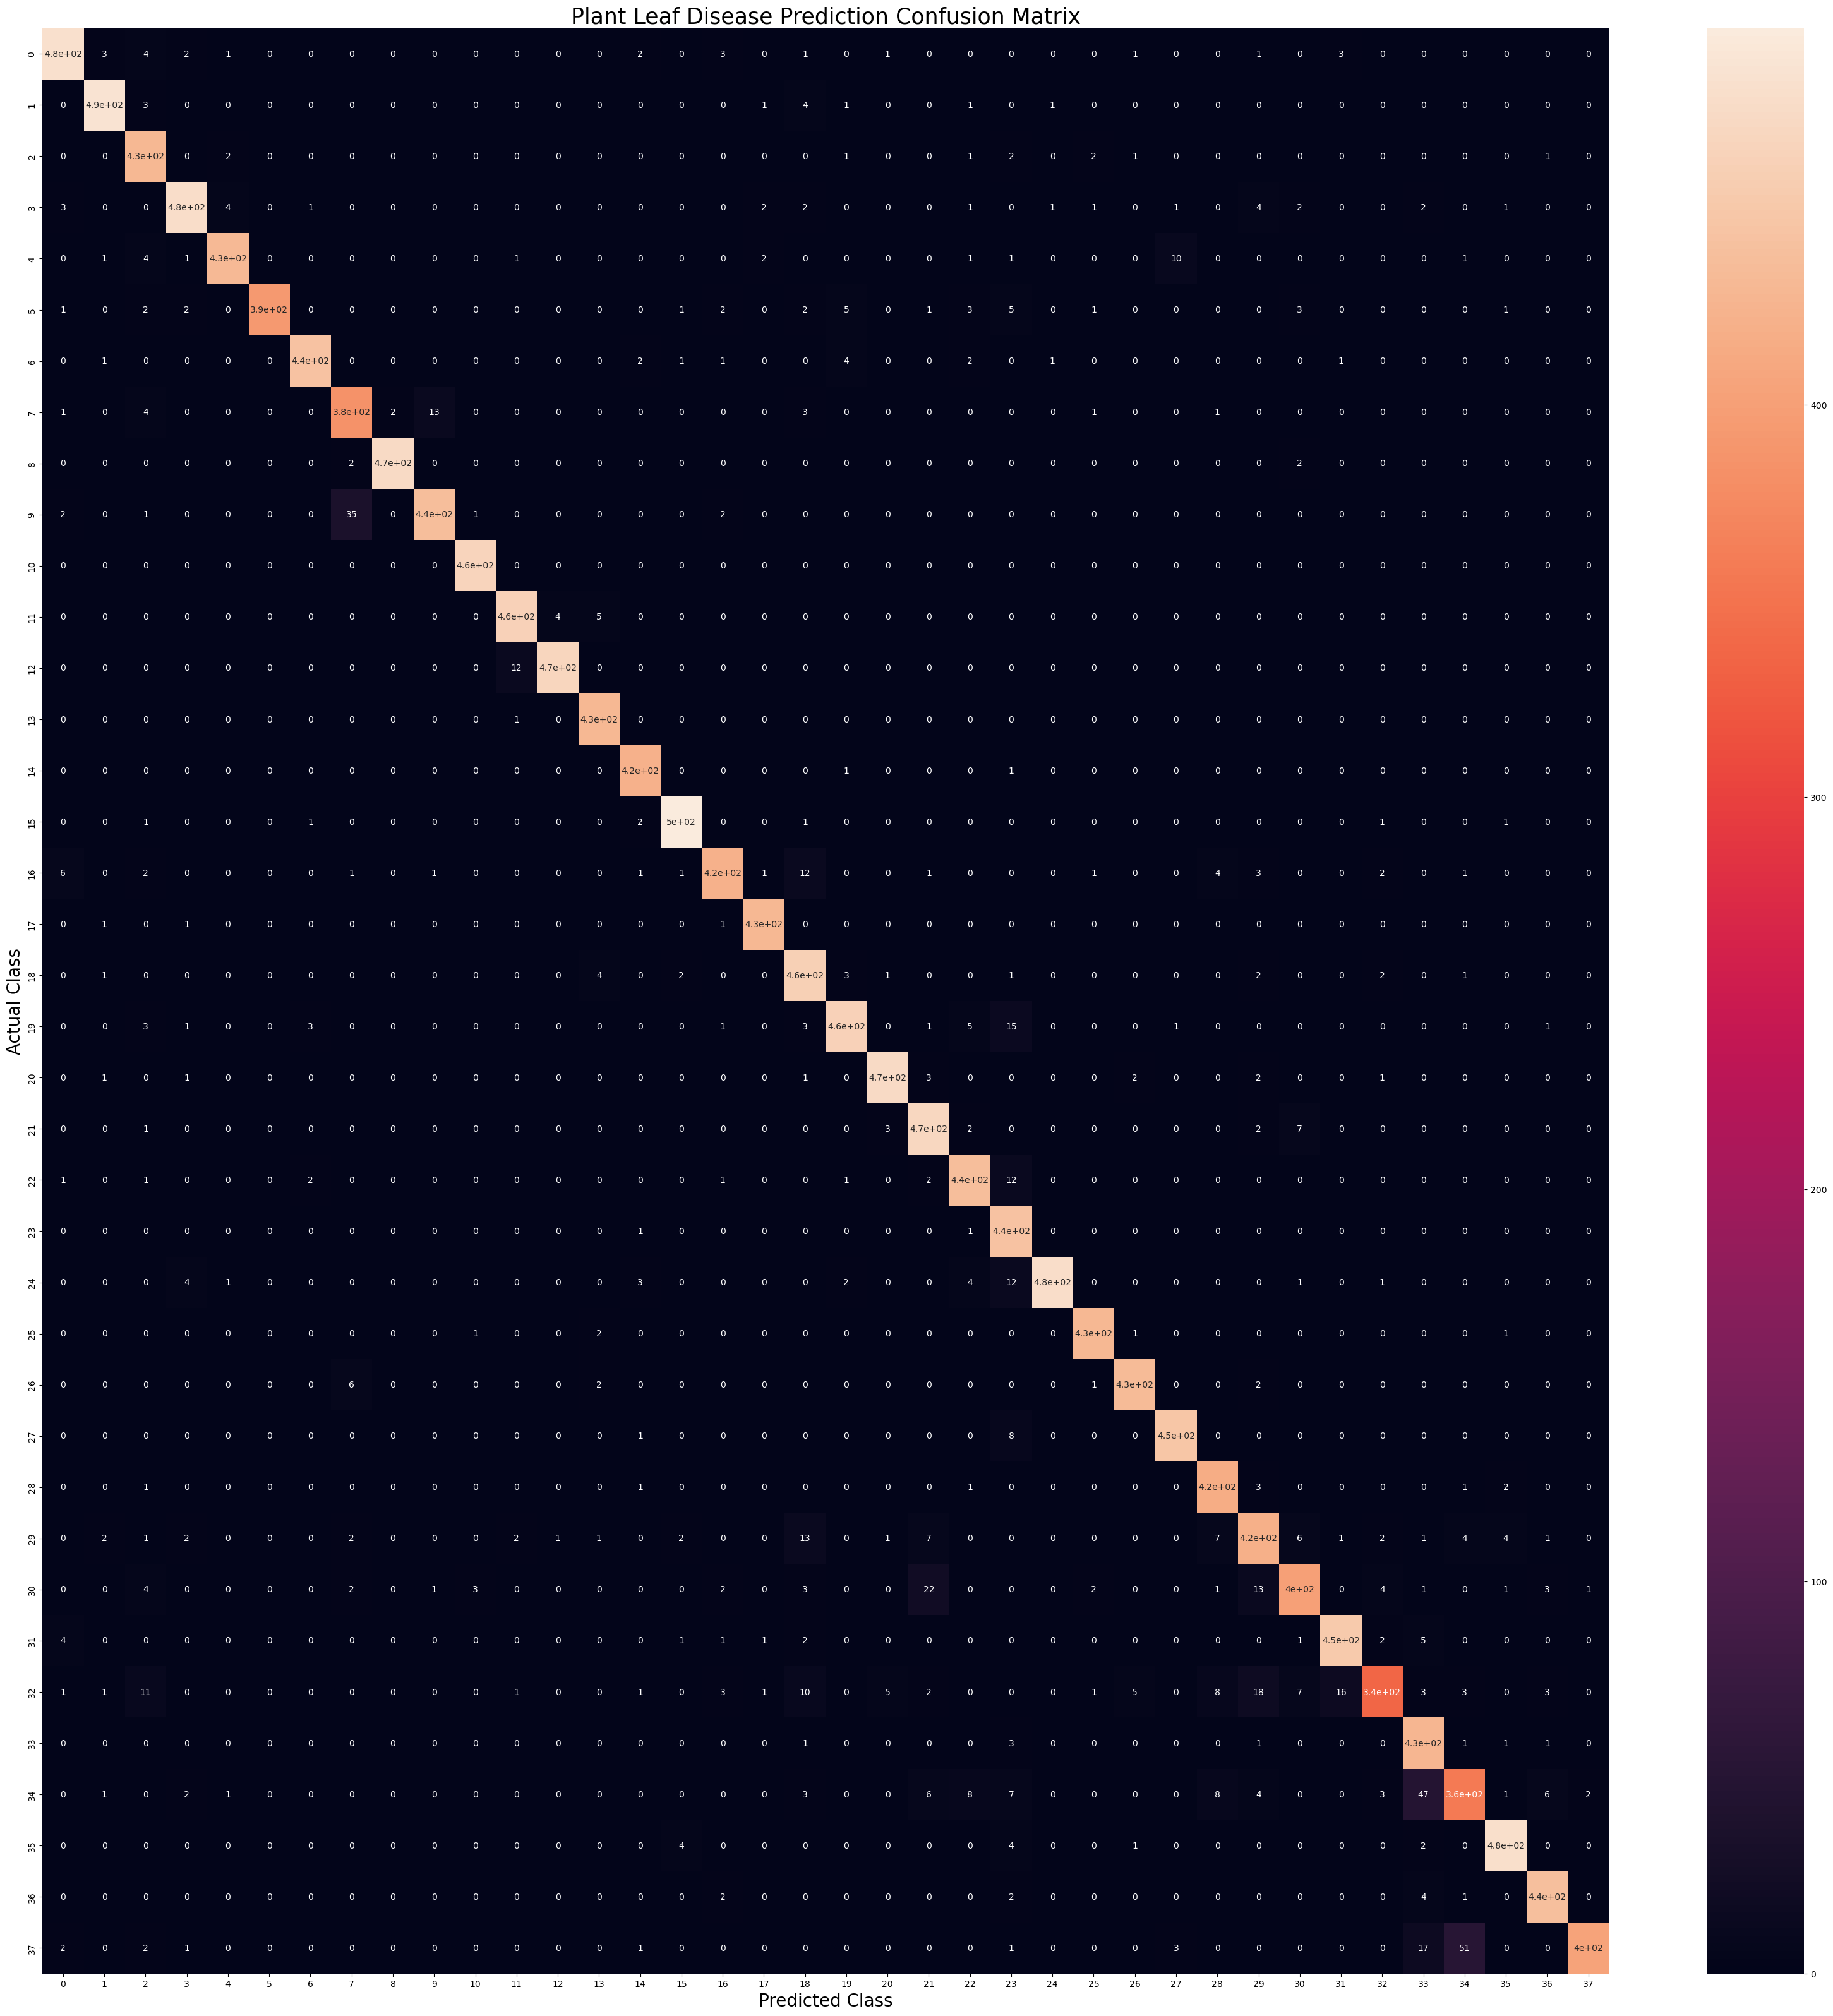

In [77]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Leaf Disease Prediction Confusion Matrix",fontsize=25)
plt.show()